### [n^2 배열 자르기](https://school.programmers.co.kr/learn/courses/30/lessons/87390)

In [ ]:
solution = lambda n, left, right: [max(divmod(x, n))+1 for x in range(left, right+1)]

### [튜플](https://school.programmers.co.kr/learn/courses/30/lessons/64065?language=python3)

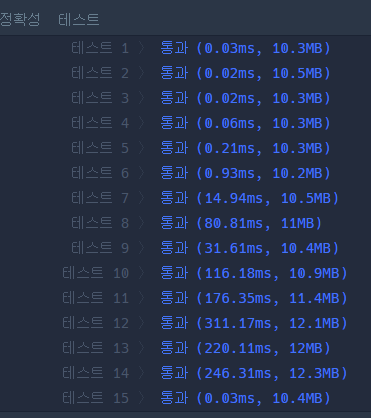

In [3]:
def solution(s):
    s = s[2:-2].split("},{")
    target = sorted([(len(x), x) for x in s], key=lambda x: x[0])
    answer = []
    for _, t in target:
        t = t.split(',')
        for a in answer:
            t.remove(a)
        answer.append(t[0])
    return [int(x) for x in answer]

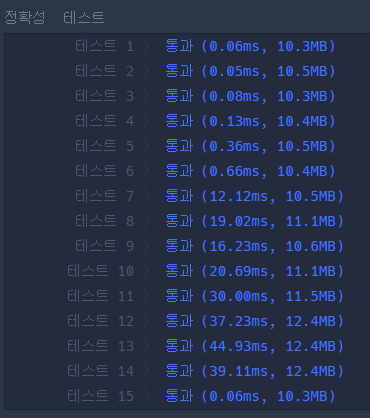

In [1]:
"""
Counter 끼리의 차집합을 이용
"""

from collections import Counter

def solution(s):
    s = s[2:-2].split("},{")
    target = sorted([(len(x), x) for x in s], key=lambda x: x[0])
    answer = []
    before = Counter()
    for _, t in target:
        t = t.split(',')
        cur = Counter(t)
        new = cur - before
        answer.append(int(list(new.keys())[0]))
        before = cur
    return answer

In [4]:
s = "{{2},{2,1},{2,1,3},{2,1,3,2}}"
solution(s)

[2, 1, 3, 2]

### [기능개발](https://school.programmers.co.kr/learn/courses/30/lessons/42586)
- 과거 풀이 개선

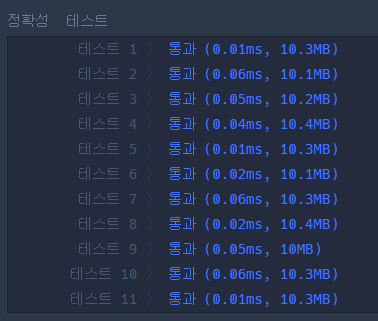

In [ ]:
from collections import deque
from math import ceil

def solution(progresses, speeds):
    answer = []
    total = deque([(x, y) for x, y in zip(progresses, speeds)])
    
    while total:
        progress, speed = total.popleft()
        share = ceil((100 - progress) / speed)
        total = deque([(x + y*share, y) for x, y in total])
        finish = 1
        while total: # 같이 끝나는 것들 확인
            progress, speed = total.popleft()
            if progress >= 100:
                finish += 1
                continue
            else :
                total.appendleft((progress, speed))
                break
        answer.append(finish)
    
    return answer            

- 기존 풀이의 경우, 성능은 나쁘지 않지만 가독성이 떨어지며 추가적인 성능 개선의 여지도 보임

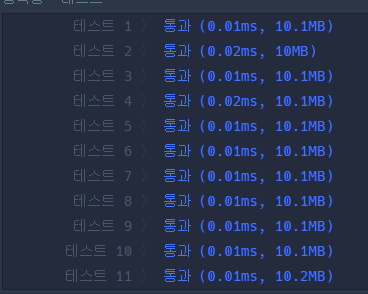

In [ ]:
"""
굳이 deque 구조를 쓰지 않고, 간단하게 풀이
"""

from math import ceil

def solution(progresses, speeds):
    answer = []
    day, done = 0, 0
    for p, s in zip(progresses, speeds):
        if 100-p > s*day: # 현재 날짜에 완료가 안된 경우
            answer.append(done)
            done = 1
            day = ceil((100-p) / s)
        else:
            done += 1
            continue
        
    return answer[1:] + [done]

### [[1차]캐시](https://school.programmers.co.kr/learn/courses/30/lessons/17680)

In [ ]:
'''
LRU 실행방식
1) cache Size를 유지
2) 기존 값과 동일한 값이 새로 들어오면, 제일 처음 것을 제거하는 게 아닌 동일한 값을 제거해 set 유지

'''


def solution(cacheSize, cities):
    if cacheSize == 0:
        return 5 * len(cities)
    
    cache = []
    total_time = 0
    for city in cities:
        city = city.upper()
        if city in cache:
            cache.remove(city)
            cache.append(city)
            total_time += 1
        else:
            if len(cache) == cacheSize:
                cache.pop(0)
            cache.append(city)
            total_time += 5
    return total_time